<a href="https://colab.research.google.com/github/PurraSujay/Computer-Vision-Projects/blob/main/_image_processing_part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMPUTER VISION IMAGE PROCESSING OPERATIONS !**

In [1]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Morphological operators !**

In [47]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [48]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [49]:
img = load_img()

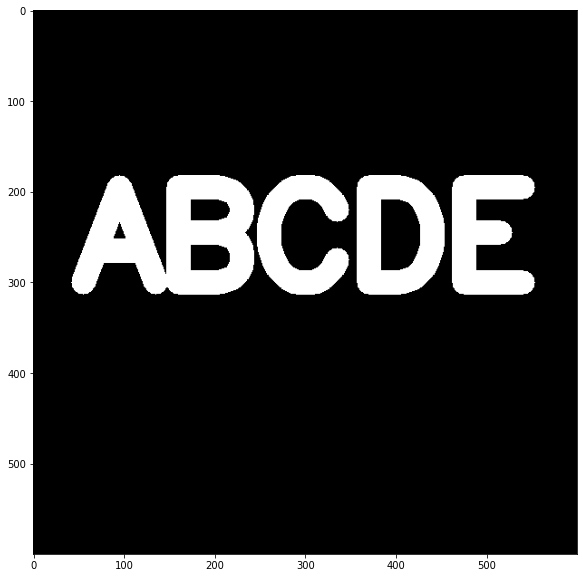

In [50]:
display_img(img)

ERESION 

Erodes away boundaries of foreground objects. Works best when foreground is light color (preferrably white) and background is dark.

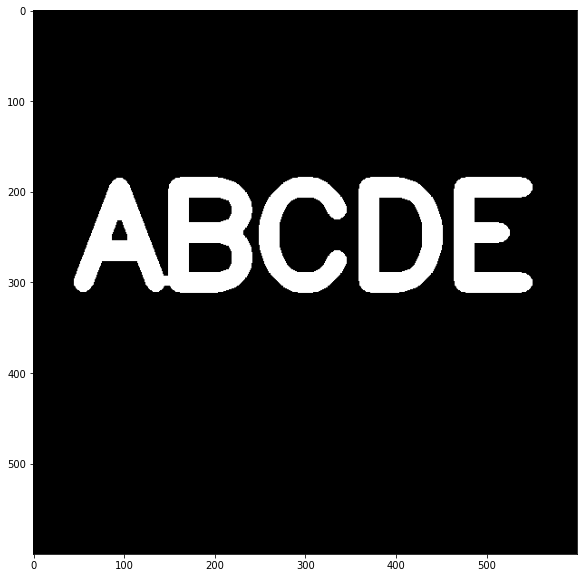

In [51]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
display_img(erosion)

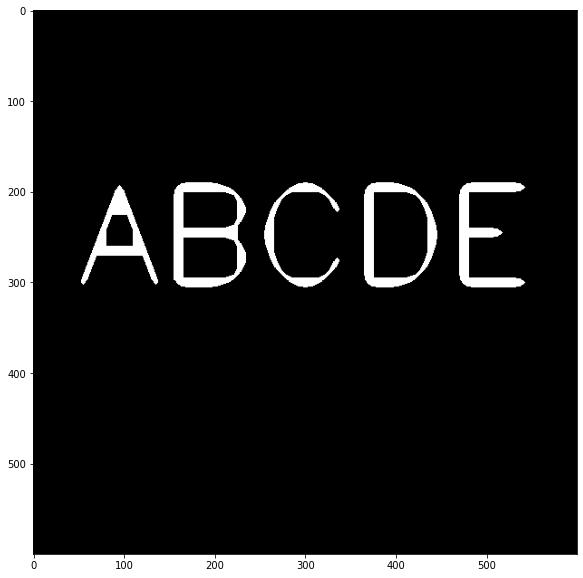

In [52]:

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img, kernel, iterations=4) #iterations changes to 4 
display_img(erosion)

#Opening

Opening is erosion followed by dilation. Useful in removing background noise!

In [79]:
img = load_img()

In [80]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [81]:
white_noise

array([[0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 1, 1]])

In [82]:
white_noise = white_noise*255

In [83]:
white_noise.shape

(600, 600)

In [84]:
img.shape

(600, 600)

In [85]:
noise_img = white_noise+img

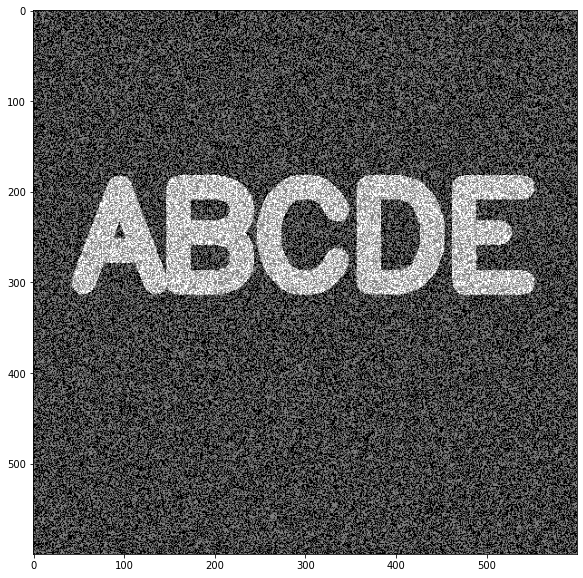

In [86]:
display_img(noise_img)

In [87]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

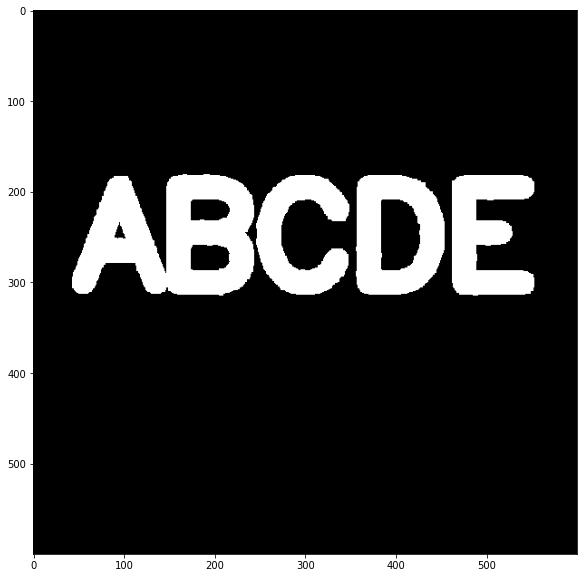

In [88]:
display_img(opening)

Closing

Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [89]:
img = load_img()

In [102]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [103]:

black_noise

array([[1, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1]])

In [104]:
black_noise= black_noise * -255

In [105]:
black_noise_img = img + black_noise

In [106]:
black_noise_img

array([[-255., -255.,    0., ..., -255.,    0.,    0.],
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [   0., -255., -255., ...,    0., -255., -255.],
       ...,
       [-255.,    0.,    0., ...,    0., -255., -255.],
       [   0., -255., -255., ..., -255., -255.,    0.],
       [-255.,    0., -255., ..., -255., -255., -255.]])

In [107]:
black_noise_img[black_noise_img==-255] = 0

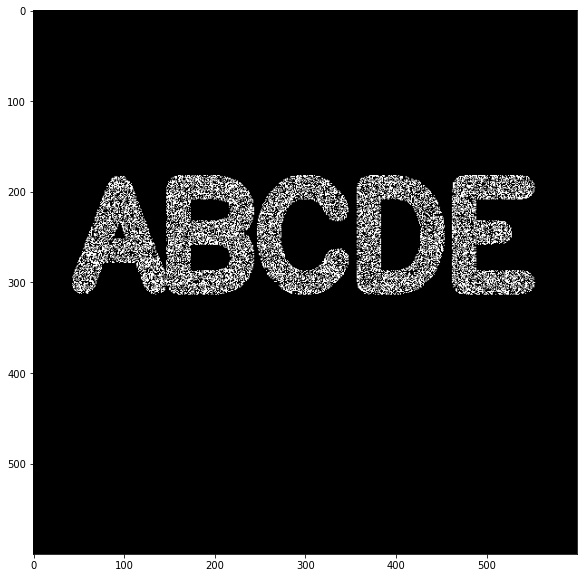

In [108]:
display_img(black_noise_img)

In [109]:
closing = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

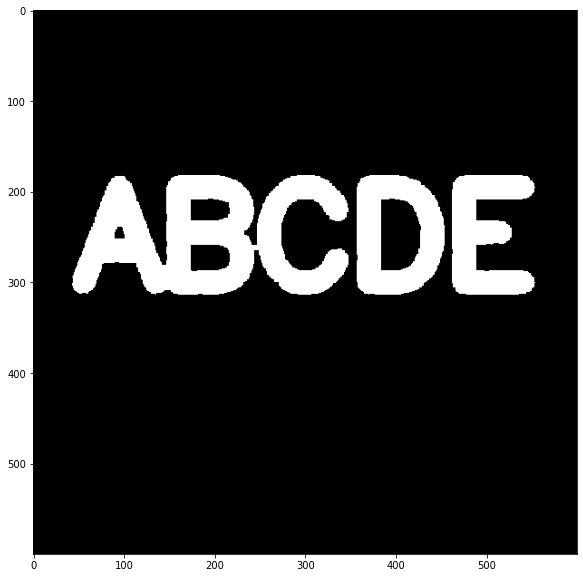

In [110]:
display_img(closing)

Morphological Gradient

Difference between dilation and erosion of an image.

In [111]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

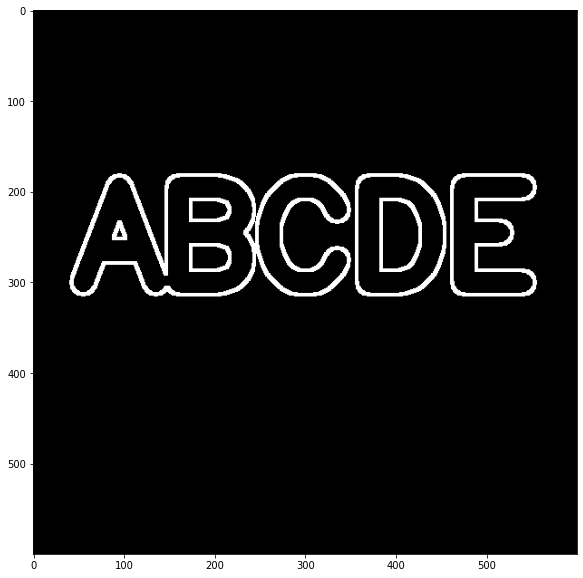

In [112]:
display_img(gradient)

**GRADIENTS**
allows us to eventually understand edge detection !


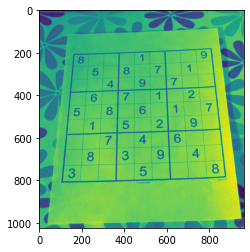

In [12]:
img1 = cv2.imread('sudoku.jpg',0)
plt.imshow(img1)

In [10]:
def display_img(img1):
  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(111)
  ax.imshow(img1, cmap='gray')

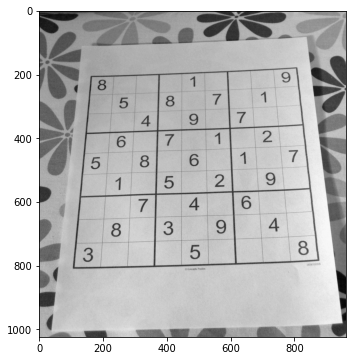

In [11]:
display_img(img1)

In [113]:
sobelx =cv2.Sobel(img1,cv2.CV_64F,1,0, ksize=5)
sobely =cv2.Sobel(img1,cv2.CV_64F,1,0, ksize=5)
laplacian = cv2.Laplacian(img1, cv2.CV_64F)

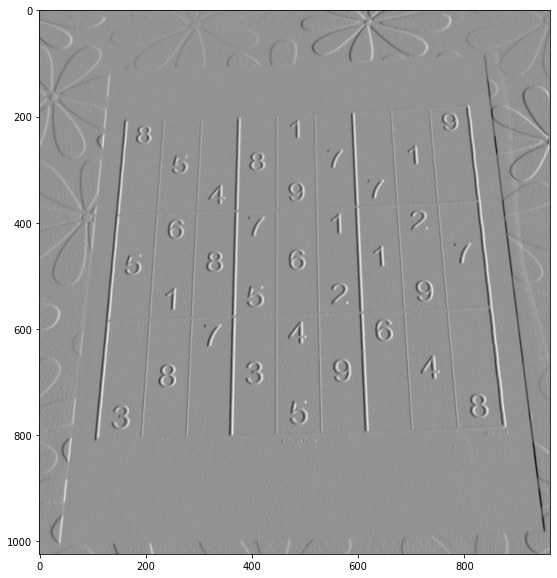

In [114]:
display_img(sobelx)

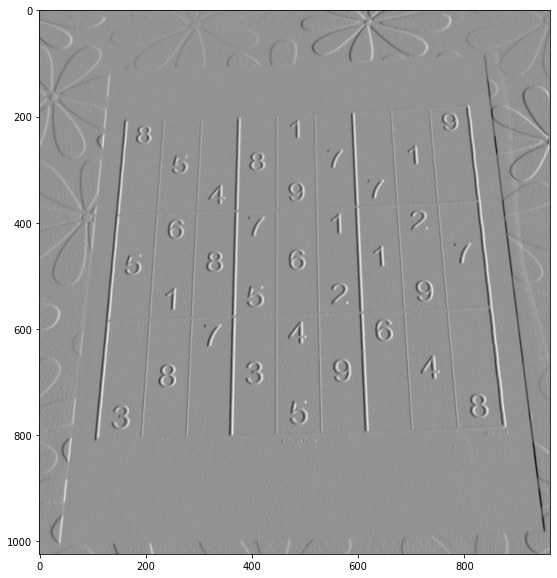

In [115]:
display_img(sobely)

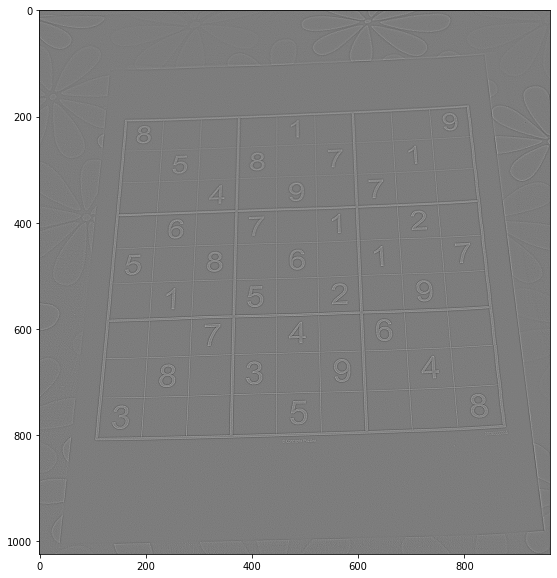

In [116]:
display_img(laplacian)

Combining Previous Ideas

Let's play around with these images with some of the other ideas we've already seen!

In [117]:
blend = cv2.addWeighted(src1=sobelx,alpha=0.5, src2=sobely, beta=0.5,gamma=0)

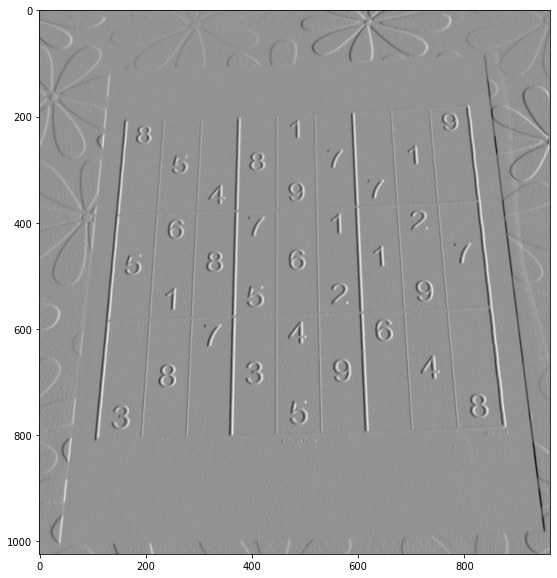

In [118]:
display_img(blend)

In [119]:
blend.shape

(1024, 962)

morphologival operators !

In [120]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blend, cv2.MORPH_GRADIENT,kernel)


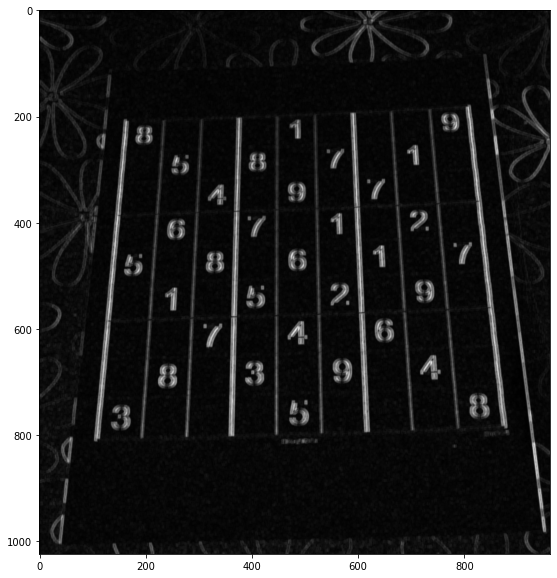

In [121]:
display_img(gradient)

applying threshold !

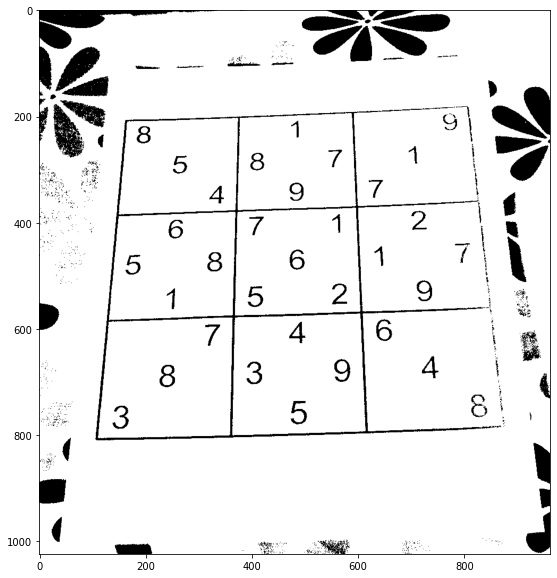

In [123]:
ret,thres1 = cv2.threshold(img1,100,255, cv2.THRESH_BINARY)
display_img(thres1)

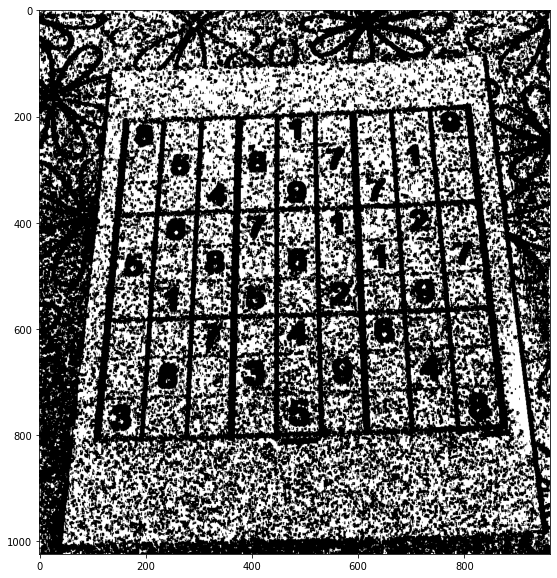

In [129]:
ret,thres1 = cv2.threshold(gradient,300,255, cv2.THRESH_BINARY_INV)
display_img(thres1)

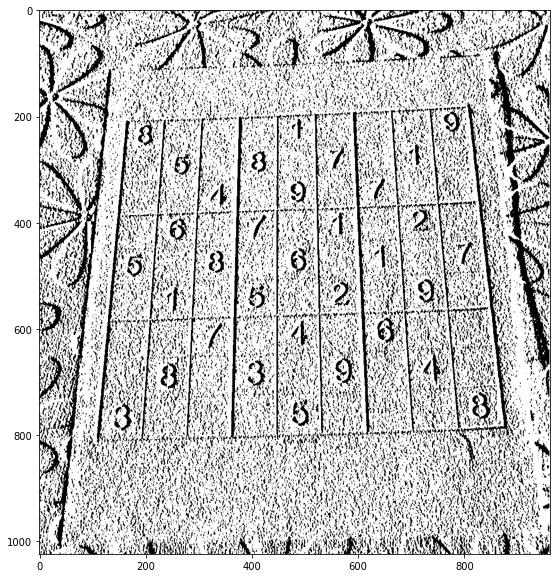

In [130]:
ret,thres1 = cv2.threshold(blend,100,255, cv2.THRESH_BINARY_INV)
display_img(thres1)

**HISTOGRAM !**

it is a graph showing the no.of pixels in an image at each diff intensity !


In [133]:
dark_horse = cv2.imread('horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('rainbow.jpg')
show_rainbow =cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

blue_bricks = cv2.imread('bricks.jpg')
show_bricks = cv2.cvtColor(blue_bricks, cv2.COLOR_BGR2RGB)

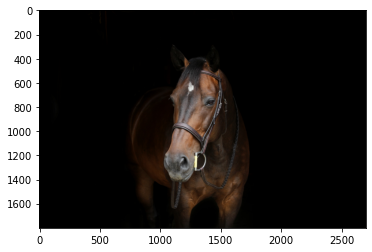

In [134]:
plt.imshow(show_horse)

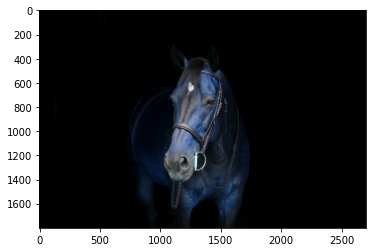

In [135]:
plt.imshow(dark_horse)

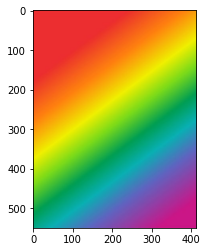

In [136]:
plt.imshow(show_rainbow)

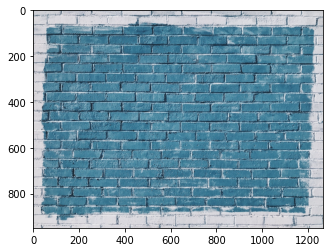

In [137]:
plt.imshow(show_bricks)

OpenCV Histogram
cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.

channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
ranges : this is our RANGE. Normally, it is [0,256].

In [138]:
hist_values = cv2.calcHist([blue_bricks],channels=[0],mask=None,histSize=[256],ranges=[0,256])

In [139]:
hist_values.shape

(256, 1)

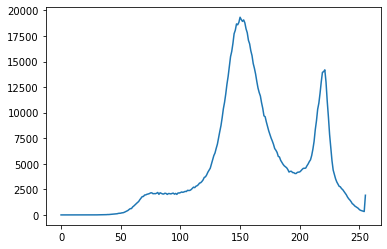

In [140]:
plt.plot(hist_values)

In [141]:
hist_values = cv2.calcHist([dark_horse],channels=[0],mask=None,histSize=[256],ranges=[0,256])

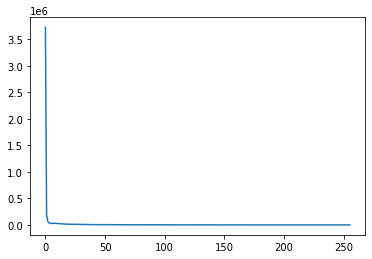

In [142]:
plt.plot(hist_values)

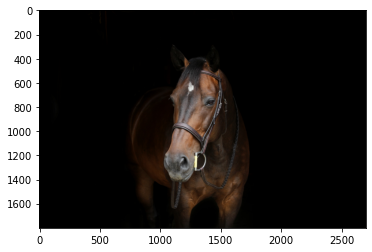

In [143]:
plt.imshow(show_horse)

Masking
We can mask only certain parts of the image.

In [144]:
img = rainbow

In [145]:
img.shape

(550, 413, 3)

In [146]:
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:400, 100:400] = 255

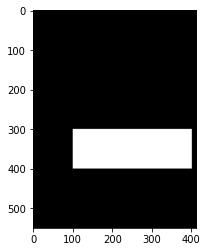

In [147]:
plt.imshow(mask,cmap='gray')

In [148]:
masked_img = cv2.bitwise_and(img,img,mask = mask)
show_masked_img = cv2.bitwise_and(show_rainbow,show_rainbow,mask = mask)

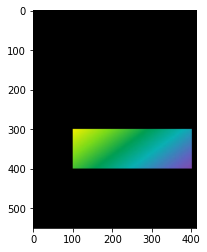

In [149]:
plt.imshow(show_masked_img)

# Histogram Equalization

In [150]:
gorilla = cv2.imread('gorilla.jpg',0)

In [151]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

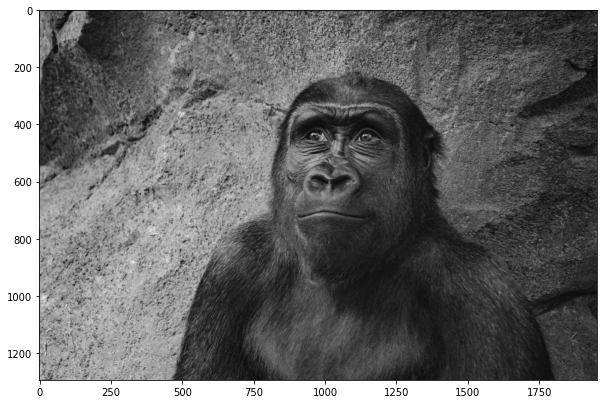

In [152]:
display(gorilla,cmap='gray')

In [153]:
hist_values = cv2.calcHist([gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

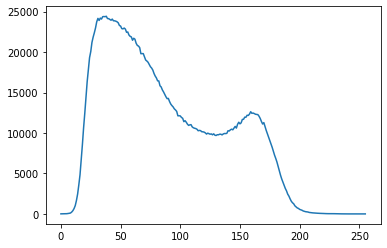

In [154]:
plt.plot(hist_values)

In [155]:
eq_gorilla = cv2.equalizeHist(gorilla)

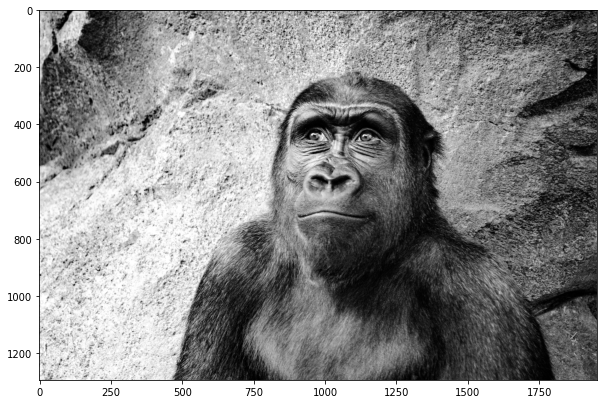

In [156]:
display(eq_gorilla,cmap='gray')

In [157]:
hist_values = cv2.calcHist([eq_gorilla],channels=[0],mask=None,histSize=[256],ranges=[0,256])

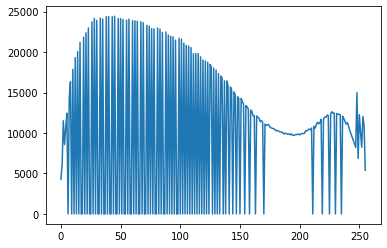

In [158]:
plt.plot(hist_values)

**Coloring images**

In [159]:
color_gorilla = cv2.imread('gorilla.jpg')
show_gorilla = cv2.cvtColor(color_gorilla,cv2.COLOR_BGR2RGB)
# Convert to HSV colorspace
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)

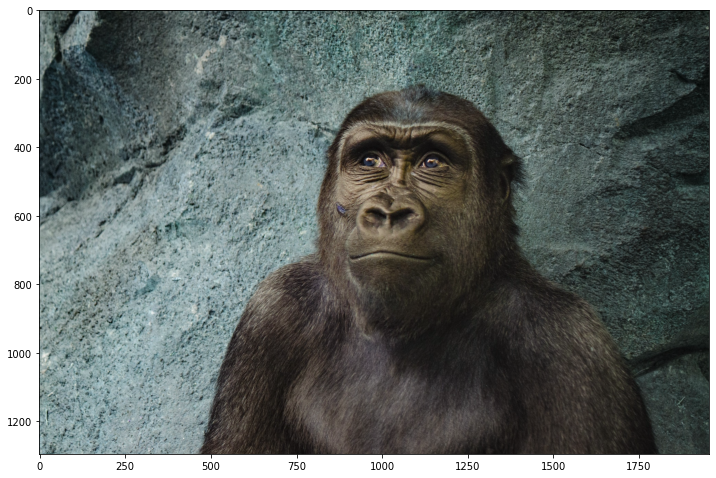

In [160]:
display_img(color_gorilla)

In [162]:
# Grab V channel
hsv[:,:,2]

array([[127, 121, 115, ...,  43,  42,  42],
       [121, 124, 123, ...,  47,  49,  51],
       [118, 129, 131, ...,  47,  50,  53],
       ...,
       [196, 198, 185, ...,  55,  55,  55],
       [184, 185, 182, ...,  51,  52,  53],
       [174, 170, 173, ...,  49,  50,  50]], dtype=uint8)

In [163]:
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])

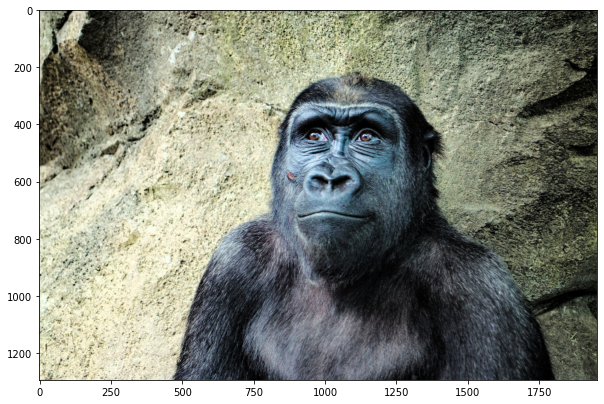

In [164]:
# Convert back to RGB to visualize
eq_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display(eq_color_gorilla)